## Install python packages

In [44]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sklearn
%pip install pyyaml

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Use YAML as config file

In [45]:
import yaml

with open('./config.yaml', 'r') as file:
    config = yaml.safe_load(file)

## Import python packages

In [46]:
# import pandas
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as lines
# import seaborn
import seaborn as sns
# one hot encoder
from sklearn.preprocessing import OneHotEncoder
# oversampling using smote
from imblearn.over_sampling import SMOTE
# splitting dataset, import randomized search
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# random forest
from sklearn.ensemble import RandomForestClassifier
# classification report
from sklearn.metrics import classification_report
# plot tree
from sklearn.tree import plot_tree
# import roc, confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

## Show COVID-19 dataset (header)

In [47]:
dataframe = pd.read_csv(config['dataset'], low_memory=False)
dataframe.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


## Show dataset info

In [48]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 705.4+ MB


## Show dataset matrix shape

In [49]:
dataframe.shape

(8405079, 11)

## Calculate null values

In [50]:
dataframe.isnull().sum()

cdc_report_dt                          0
pos_spec_dt                      5534290
onset_dt                         4009122
current_status                         0
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
hosp_yn                                0
icu_yn                                 0
death_yn                               0
medcond_yn                             0
dtype: int64

## Describe dataset

In [51]:
dataframe.describe()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
count,8405079,2870789,4395957,8405079,8405061,8404990,8405072,8405079,8405079,8405079,8405079
unique,321,313,338,2,5,10,9,4,4,4,4
top,2020/06/24,2020/11/09,2020/11/02,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
freq,155857,50595,49527,7910118,4340898,1635264,2781176,3502556,6178281,3690813,6063390


## Drop dataset null values

In [52]:
df_clean_rows = dataframe.dropna()
df_clean_rows.describe()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
count,1386645,1386645,1386645,1386645,1386645,1386645,1386645,1386645,1386645,1386645,1386645
unique,313,302,338,2,5,10,9,4,4,4,4
top,2020/11/17,2020/11/09,2020/11/09,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,No,No,No
freq,38682,21470,15941,1359068,732481,282718,624505,1033663,550623,911684,478367


## Plot `age_group`

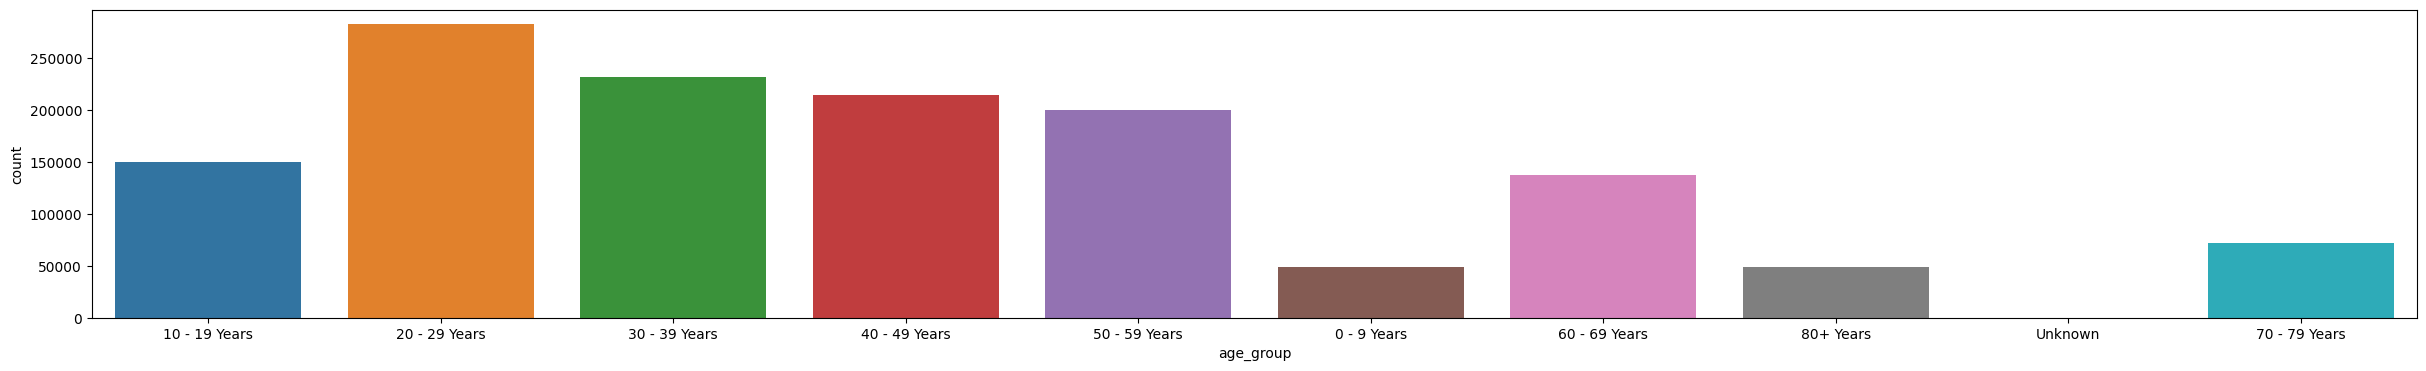

In [53]:
plt.figure(figsize = (30,4))
sns.countplot(x='age_group', data=df_clean_rows)
plt.show()

## Plot `Race and ethnicity (combined)`

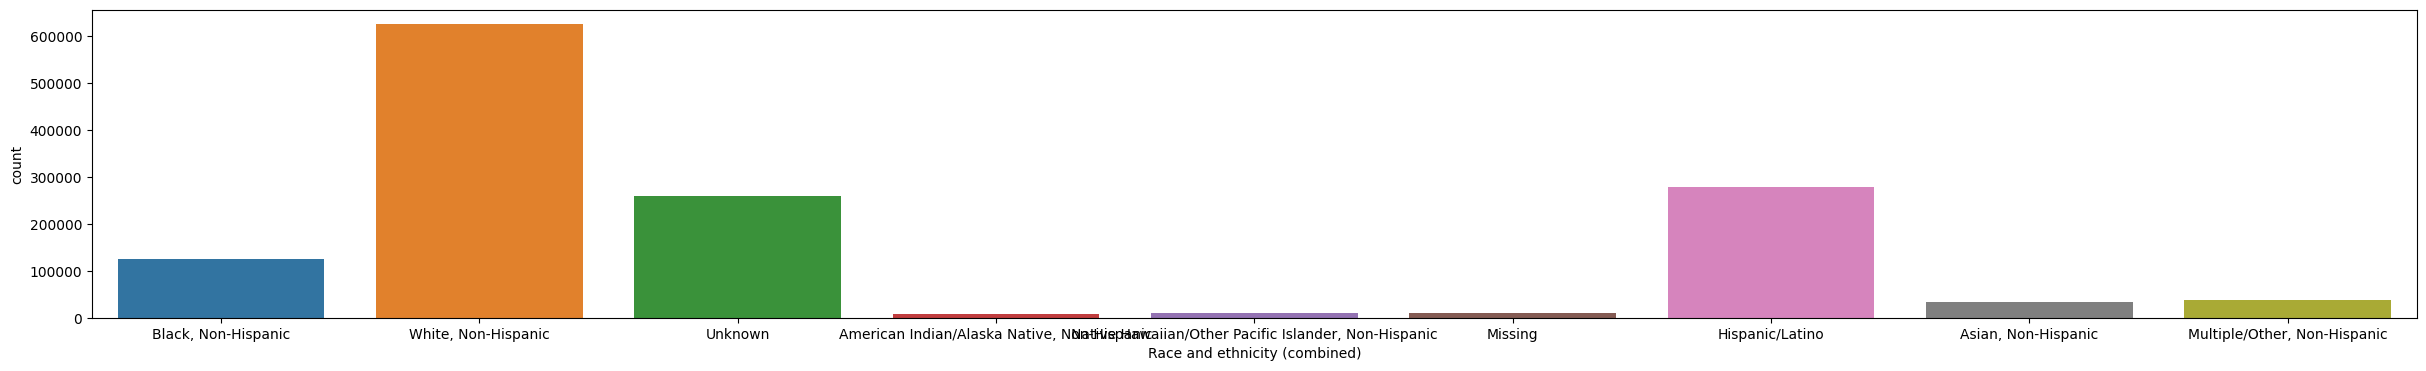

In [54]:
plt.figure(figsize = (30,4))
sns.countplot(x='Race and ethnicity (combined)', data=df_clean_rows)
plt.show()

## Encode all labels

In [55]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = [
    'cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
    'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
    'medcond_yn', 'death_yn'
]

le = LabelEncoder()

for column in columns_to_encode:
    df_clean_rows.loc[:, column] = le.fit_transform(df_clean_rows[column])

df_clean_rows

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
1,307,279,314,0,1,1,2,1,1,1,1
2,312,279,313,0,1,1,2,1,1,1,1
4,306,279,314,0,1,1,2,1,1,1,3
5,310,279,312,0,1,1,2,0,0,0,0
11,302,279,313,0,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7494726,305,300,316,0,0,2,8,2,0,0,0
7494727,290,300,301,0,1,2,8,2,0,0,0
7494728,258,300,269,0,1,2,8,1,0,0,0
7494729,250,300,261,0,1,2,2,1,0,0,0


## Get X value and drop `age_group`, `death_yn`

In [56]:
X = df_clean_rows.drop(['age_group', 'death_yn'],axis=1)
X.shape

(1386645, 9)

## Show X values

In [57]:
X

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,Race and ethnicity (combined),hosp_yn,icu_yn,medcond_yn
1,307,279,314,0,1,2,1,1,1
2,312,279,313,0,1,2,1,1,1
4,306,279,314,0,1,2,1,1,3
5,310,279,312,0,1,2,0,0,0
11,302,279,313,0,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...
7494726,305,300,316,0,0,8,2,0,0
7494727,290,300,301,0,1,8,2,0,0
7494728,258,300,269,0,1,8,1,0,0
7494729,250,300,261,0,1,2,1,0,0


## Get copy of X

In [58]:
X_copy = X.copy()
X_copy.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,Race and ethnicity (combined),hosp_yn,icu_yn,medcond_yn
1,307,279,314,0,1,2,1,1,1
2,312,279,313,0,1,2,1,1,1
4,306,279,314,0,1,2,1,1,3
5,310,279,312,0,1,2,0,0,0
11,302,279,313,0,1,2,1,1,1


In [59]:
y = df_clean_rows['age_group'].values[:,np.newaxis]
y.shape

(1386645, 1)

In [60]:
y

array([[1],
       [1],
       [1],
       ...,
       [2],
       [2],
       [2]], dtype=object)

In [61]:
# split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1098222, 9)
Number transactions y_train dataset:  (1098222, 1)
Number transactions X_test dataset:  (13867, 9)
Number transactions y_test dataset:  (13867, 1)


In [62]:
# create a random forest classifier with default hyperparameters
rf = RandomForestClassifier()

In [63]:
# define the hyperparameters to search over
param_distributions = {'n_estimators': [10, 50, 100, 200],
                       'max_depth': [None, 5, 10, 20],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}

In [64]:
# Remove feature names from X
# X_train = pd.DataFrame(X_train.values)

# Perform randomized search over the hyperparameters
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5, error_score='raise')
X_train = X_train.values # conversion of X  into array
random_search.fit(X_train, y_train)

# Fit the classifier to the data using the best hyperparameters found by randomized search
rf_best = random_search.best_estimator_
rf_best.fit(X_train, y_train)

c:\Users\OMEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


ValueError: Unknown label type: 'unknown'